# Imports and Data Setup

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

data = pd.read_csv('test_data/PanelData.csv')[1:][['TIME','Load','Ambient','Vibration','Anomaly']]
labelencoder = LabelEncoder()
data


,TIME,Load,Ambient,Vibration,Anomaly
1,0.00,1992,22.3,0.17,100%
2,1.00,1990.3,22.3,0.17,100%
3,2.00,1984.2,22.3,0.146,100%
4,3.00,1988.3,22.4,0.132,100%
5,4.00,1986.1,22.4,0.09,100%
...,...,...,...,...,...
1074,1073.00,77.3,23.6,0.109,HEATER SWITCHBOARD
1075,1074.00,77.3,23.6,0.109,HEATER SWITCHBOARD
1076,1075.00,77.3,23.6,0.107,HEATER SWITCHBOARD
1077,1076.00,77.3,23.6,0.113,HEATER SWITCHBOARD


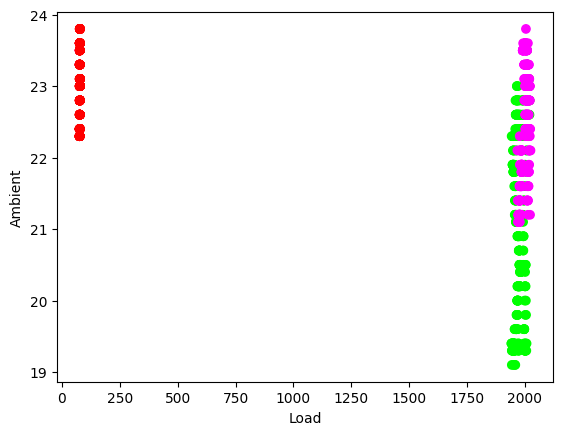

In [49]:
colors = {
    "100%": (0.0, 1.0, 0.0),
    "HEATER JUNCTION J2": (1.0,0,1.0),
    "HEATER SWITCHBOARD": (1.0,0.0,0.0)
}
colorList = [colors.get(col[0]) for col in data[['Anomaly']].to_numpy().tolist()]
X, y = data[['Load']].to_numpy().tolist(), data[['Ambient']].to_numpy().tolist()
plt.scatter(X,y,c=colorList)
plt.xlabel('Load')
plt.ylabel('Ambient')
plt.show()

Best N Neighors: 5


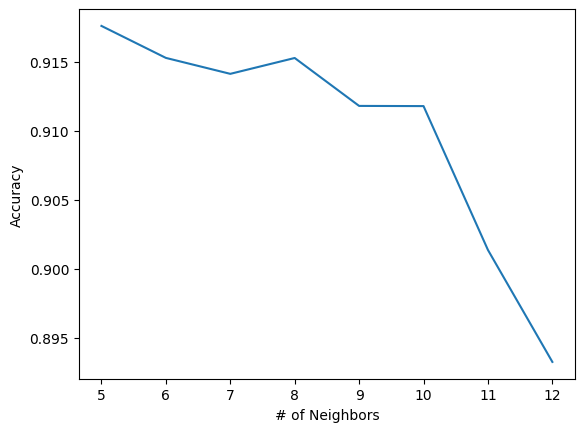

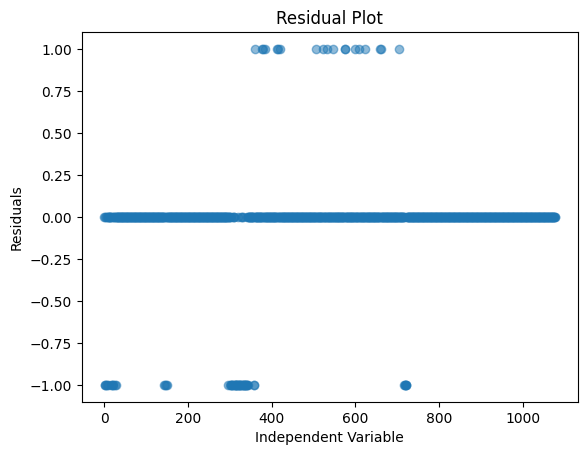

In [78]:
target_encoded = labelencoder.fit_transform(data['Anomaly'])
X_train, X_test, Y_train, Y_test = train_test_split(data[['Load','Ambient','Vibration']], target_encoded, test_size=0.2)
cross_value_scores = []

# Neighbors to test / X Axis
neighbors = [5,6,7,8,9,10,11,12]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)
    avg = np.mean(scores)
    cross_value_scores.append(avg)

best_n_neighbors = neighbors[np.argmax(cross_value_scores)]
print(f'Best N Neighors: {best_n_neighbors}')

# Plotting
fig, ax = plt.subplots()
plt.plot(neighbors,cross_value_scores)
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy")
plt.show()

model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
model.fit(X_train,Y_train)

y_pred = model.predict(data[['Load','Ambient','Vibration']])
residuals = target_encoded - y_pred

plt.scatter(data[['TIME']].to_numpy().tolist(), residuals, alpha=0.5)  

# Set labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()
